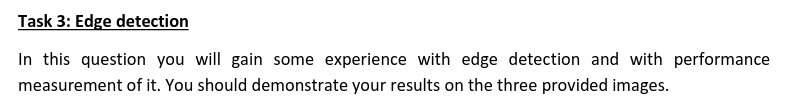

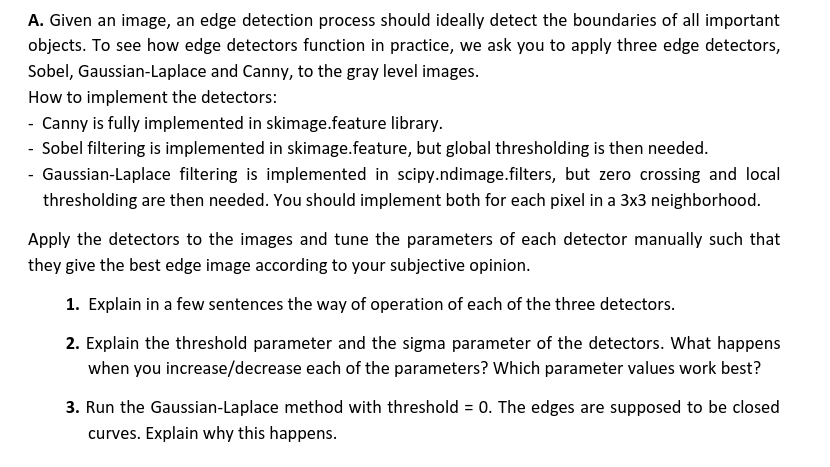

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature
from scipy import ndimage
import os
import cv2
import scipy as sp
import scipy.ndimage as nd   
from sklearn.metrics import precision_recall_curve, f1_score

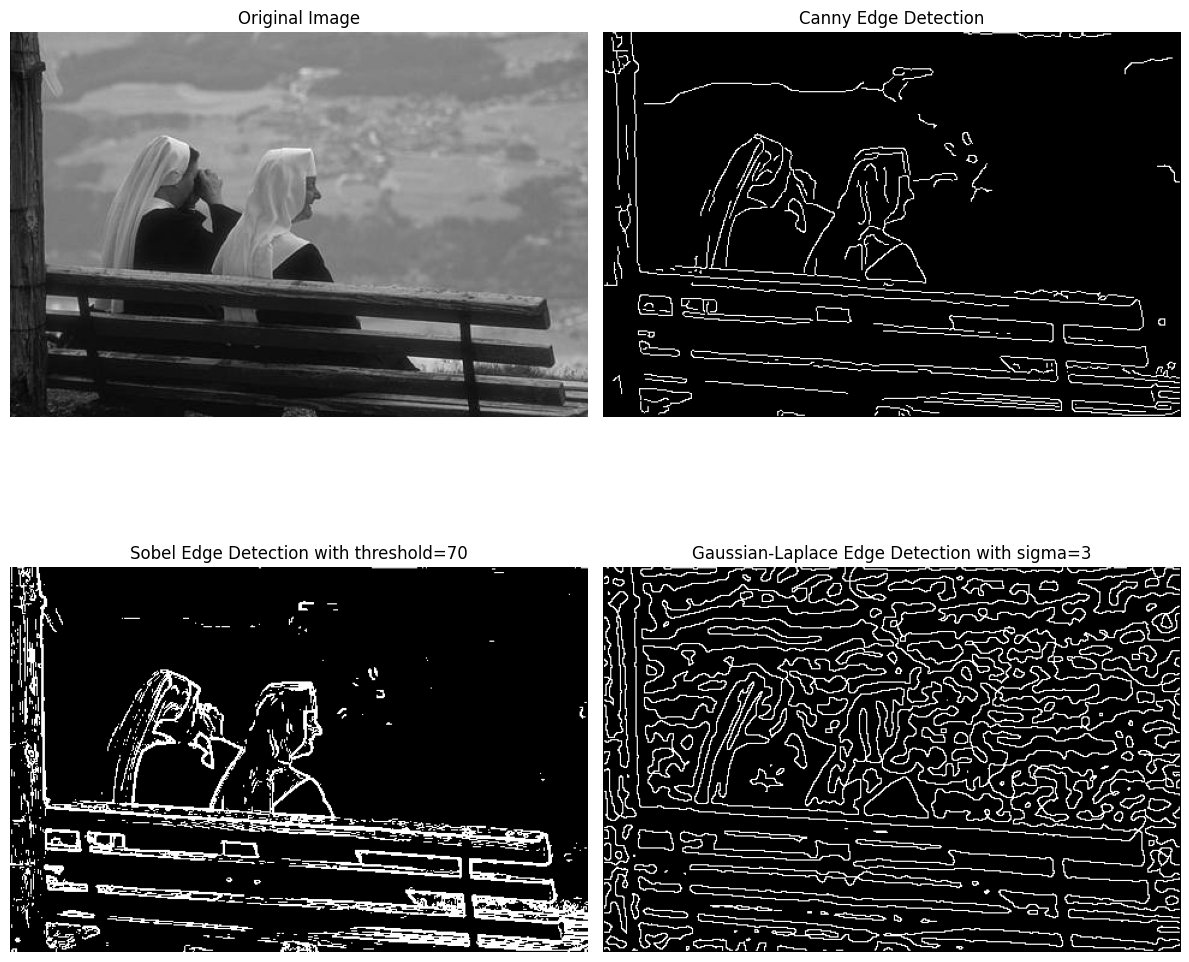

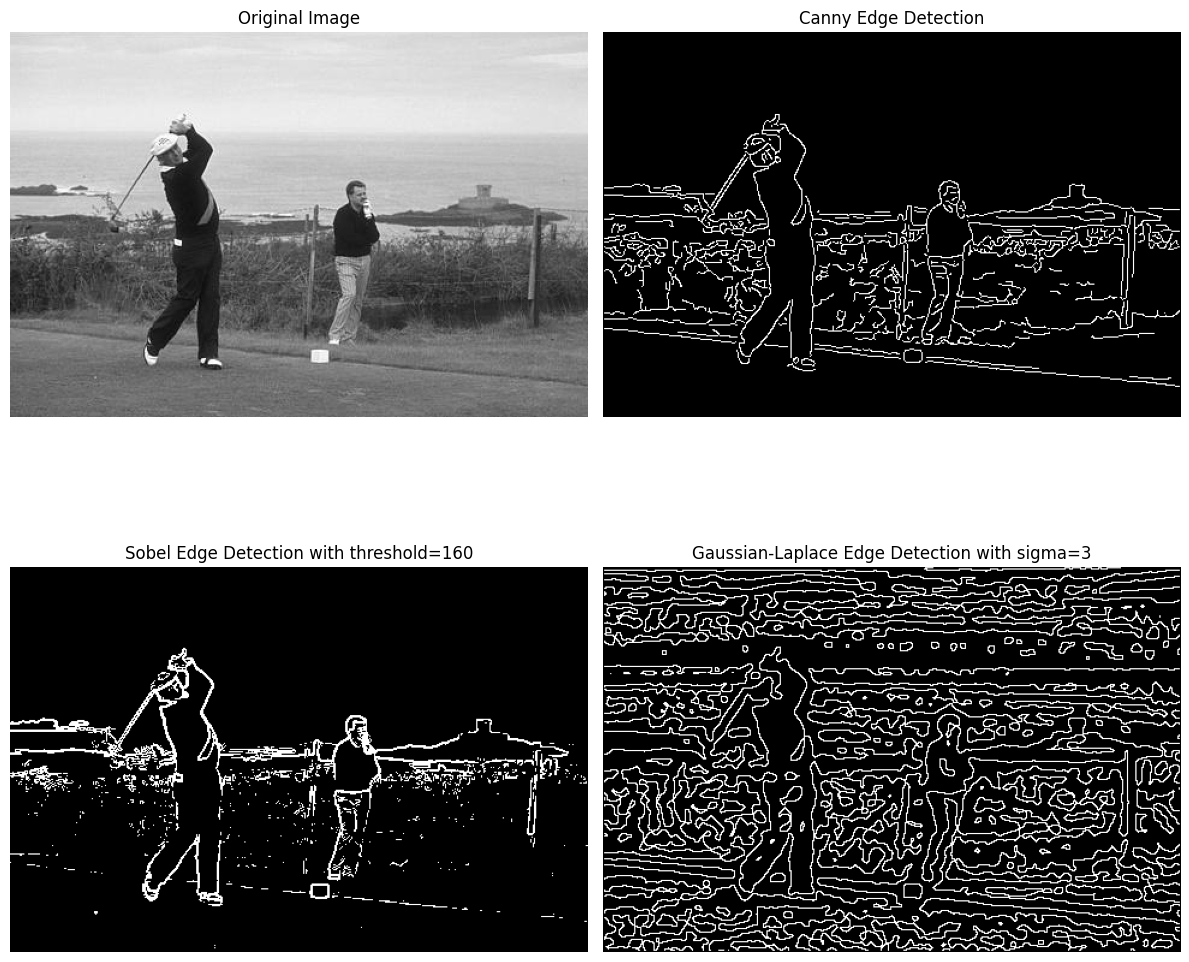

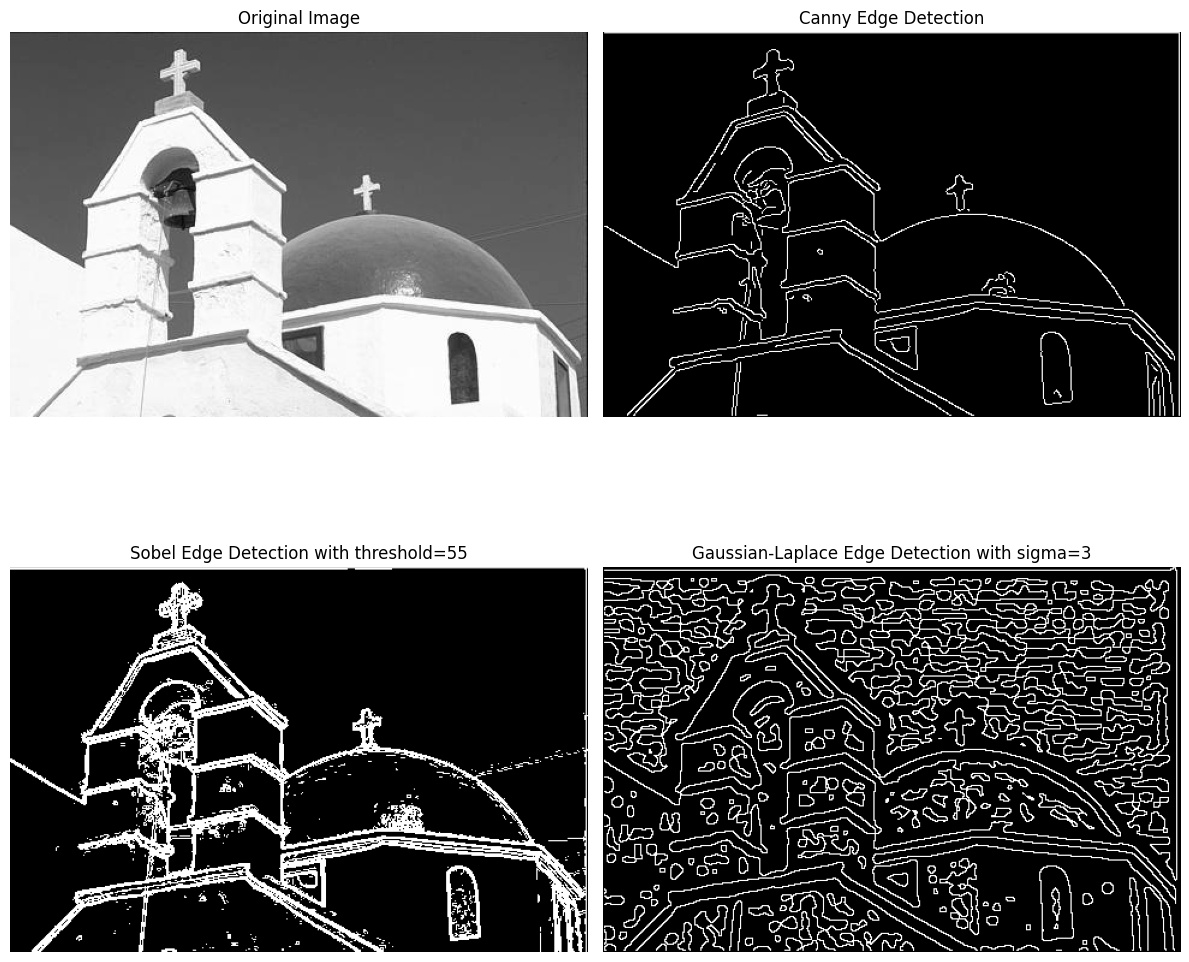

In [34]:
def Canny_Edge_detector(org_img):
    return feature.canny(org_img,sigma=1.3)


def sobel_edge_detector(image,threshold):
    # Apply Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Apply a threshold to identify edges
    edges = magnitude > threshold

    return edges

def LofG(img,sigma=1., thresh=0.1):
    LoG = nd.gaussian_laplace(np.array(img,dtype="float"),sigma)        # Calculate LoG image
    th = 10*np.absolute(LoG).mean()*thresh              # Calculate threshold
    output = np.zeros(LoG.shape)
    w = output.shape[1]
    h = output.shape[0]

    for y in range(1, h - 1):
        for x in range(1, w - 1):                                                                
            patch = LoG[y-1:y+2, x-1:x+2]               # Get 3x3 patch         (x,y)             [(0,0), (0,1), (0,2)]
            if patch[1,1]<0:                            # Check all cases of [-] in the middle    [(1,0), (1,1), (1,2)]
                                                        #                                         [(2,0), (2,1), (2,2)]
                if (patch.max()>0) and (patch.max()-patch[1,1]>th):
                    output[y, x] = 1;
            elif patch[1,1]==0:
                if (np.sign(patch[0,1])*np.sign(patch[2,1])<0) and (np.absolute(patch[2,1]-patch[0,1])>th): # Check [- 0 +]', [+ 0 -]'
                    output[y, x] = 1;
                if (np.sign(patch[1,0])*np.sign(patch[1,2])<0) and (np.absolute(patch[1,2]-patch[1,0])>th): # Check [- 0 +], [+ 0 -]
                    output[y, x] = 1;
                if (np.sign(patch[0,0])*np.sign(patch[2,2])<0) and (np.absolute(patch[2,2]-patch[0,0])>th): # Check main diagonal
                    output[y, x] = 1;
                if (np.sign(patch[2,0])*np.sign(patch[0,2])<0) and (np.absolute(patch[0,2]-patch[2,0])>th): # Check inverse diagonal
                    output[y, x] = 1;
    return output

def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.shape != img2.shape:
        print("Images don't have the same shape.")
        return None
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)


imges = os.listdir('./Images/Task3')  
thresholds = [70,160,55]
sigmas = [3,3,3]
index = 0;
for img in imges:
    if img.endswith('.jpg'):
        # Display the results
        image= io.imread(f'./Images/Task3/{img}')
        if image.ndim == 3:
            gray_image = color.rgb2gray(image)
        else:
            gray_image = image
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        ax = axes.ravel()
        ax[0].imshow(gray_image, cmap='gray')
        ax[0].set_title('Original Image')

        ax[1].imshow(Canny_Edge_detector(gray_image), cmap='gray')
        ax[1].set_title('Canny Edge Detection')

        ax[2].imshow(sobel_edge_detector(image,thresholds[index]), cmap='gray')
        ax[2].set_title(f'Sobel Edge Detection with threshold={thresholds[index]}')

        # result1= ndimage.gaussian_laplace(gray_image,sigmas[index])
        # zeroCross1 = zero_crossing(result1)
        
        zeroCross2= LofG(gray_image,sigmas[index],0)
        
        # print(calculate_ssd(zeroCross1, zeroCross2))
        ax[3].imshow(zeroCross2, cmap='gray')
        ax[3].set_title(f'Gaussian-Laplace Edge Detection with sigma={sigmas[index]}')
    

        for a in ax:
            a.axis('off')

        plt.tight_layout()
        plt.show()
        index +=1


Isotropic Nature of the Laplacian: The Laplacian operator is isotropic, meaning it detects edges regardless of their orientation. This uniform sensitivity to edges in all directions helps in detecting continuous and closed edge patterns.

Gaussian Smoothing: The initial Gaussian smoothing step reduces noise and small details, leading to smoother and more continuous edge contours. This helps in forming more closed and complete edge curves rather than fragmented ones.

Zero-Crossings Form Closed Loops: The nature of the zero-crossings in the Laplacian filter is such that they often form closed loops. This is because the Laplacian filter detects changes in intensity gradients, which tend to enclose regions where the intensity is relatively uniform.

Mathematical Properties: The mathematical properties of the Laplacian ensure that the second derivative (Laplacian) changes sign at the boundaries of objects. Since objects in an image typically have enclosed boundaries, the zero-crossings naturally form closed curves.

Threshold Effect: With a threshold of 0, every zero-crossing is considered an edge, even if the change in intensity is very slight. This can result in many closed contours, as every slight gradient change in the image gets detected as part of an edge.

In [ ]:
# Improve canny Edge detector, find the Weakness and improve it(find where the bug)

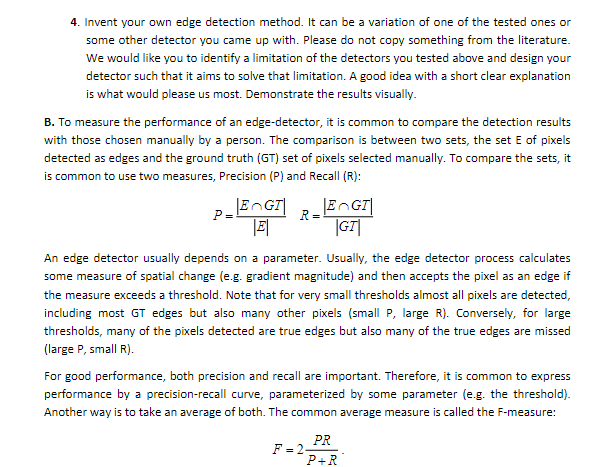
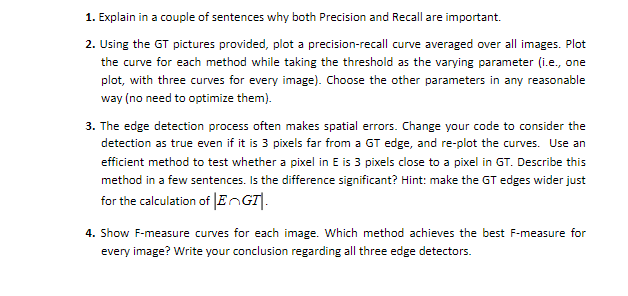

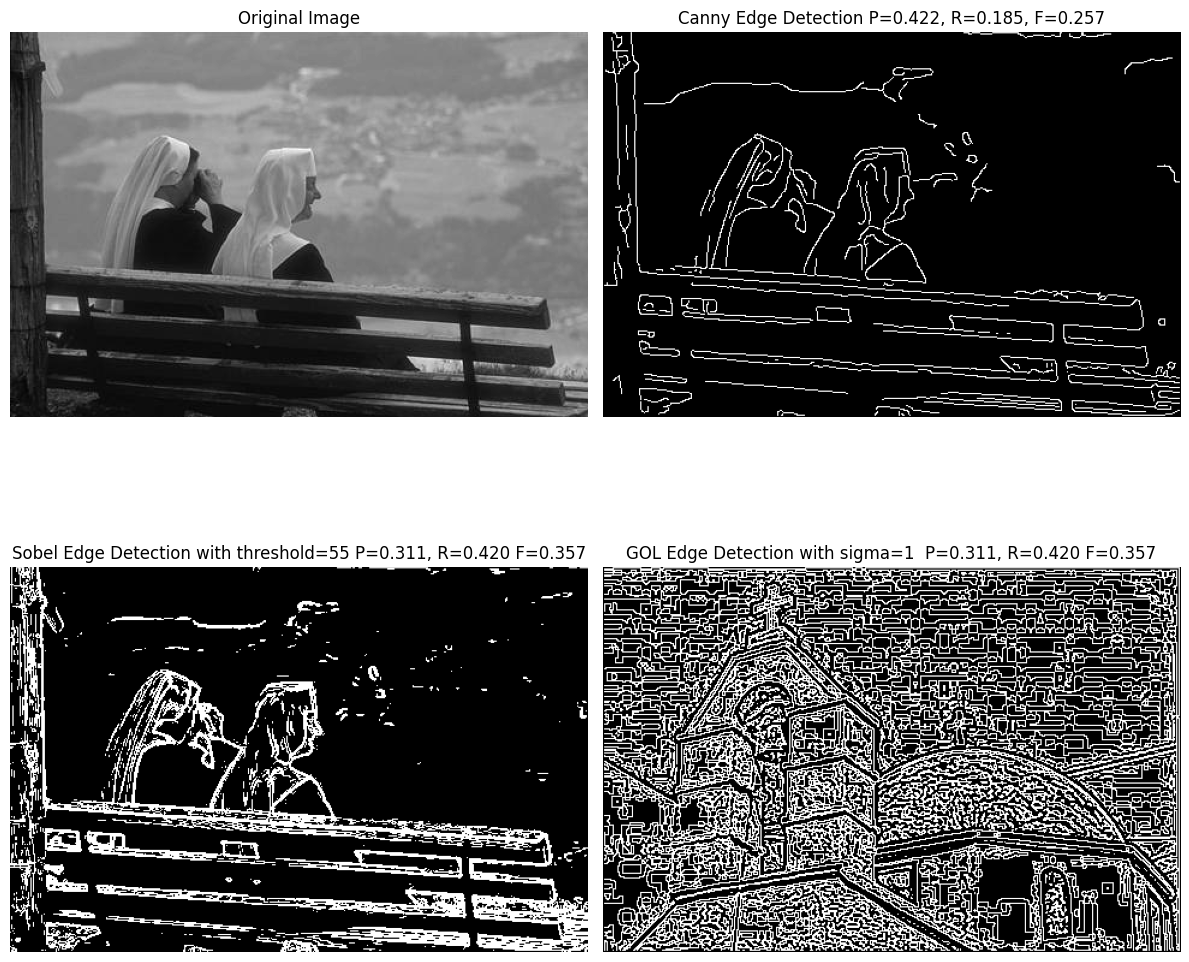

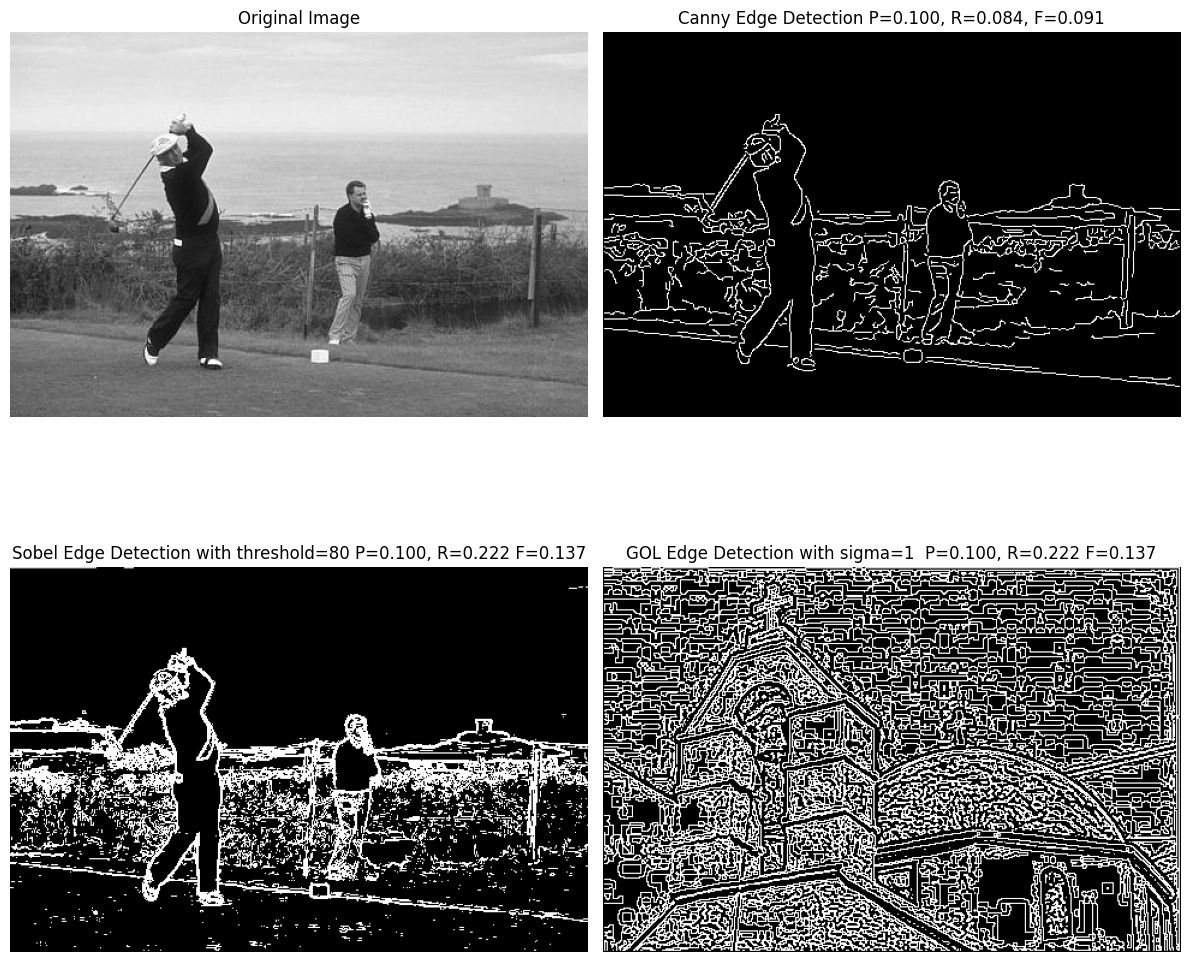

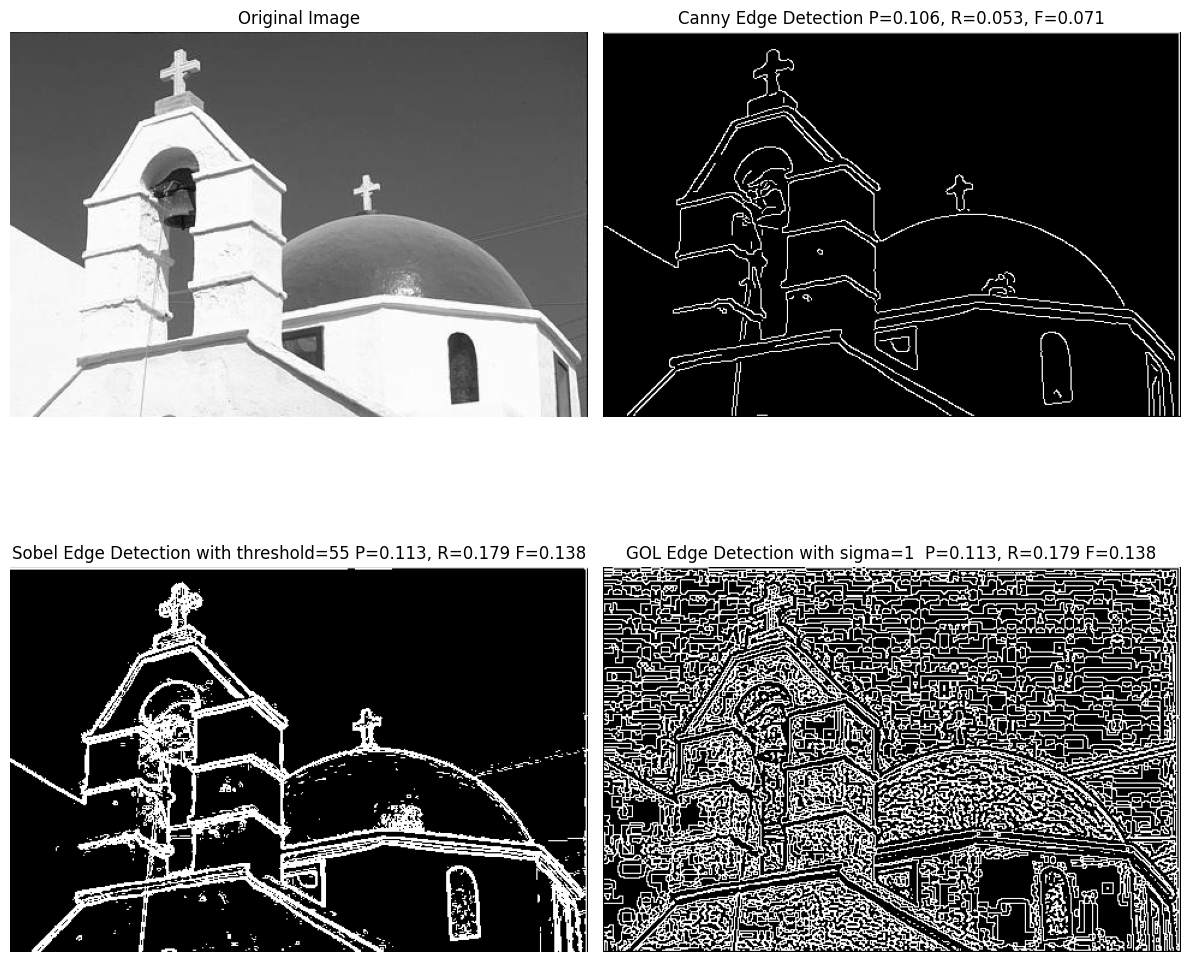

In [26]:
def Canny_Edge_detector(org_img):
    return feature.canny(org_img,sigma=1.3)


def sobel_edge_detector(image,threshold):
    # Apply Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Apply a threshold to identify edges
    edges = magnitude > threshold

    return edges

def LofG(img,sigma=1., thresh=0.1):
    LoG = nd.gaussian_laplace(np.array(img,dtype="float"),sigma)        # Calculate LoG image
    th = 10*np.absolute(LoG).mean()*thresh              # Calculate threshold
    output = np.zeros(LoG.shape)
    w = output.shape[1]
    h = output.shape[0]

    for y in range(1, h - 1):
        for x in range(1, w - 1):                                                                
            patch = LoG[y-1:y+2, x-1:x+2]               # Get 3x3 patch         (x,y)             [(0,0), (0,1), (0,2)]
            if patch[1,1]<0:                            # Check all cases of [-] in the middle    [(1,0), (1,1), (1,2)]
                                                        #                                         [(2,0), (2,1), (2,2)]
                if (patch.max()>0) and (patch.max()-patch[1,1]>th):
                    output[y, x] = 1;
            elif patch[1,1]==0:
                if (np.sign(patch[0,1])*np.sign(patch[2,1])<0) and (np.absolute(patch[2,1]-patch[0,1])>th): # Check [- 0 +]', [+ 0 -]'
                    output[y, x] = 1;
                if (np.sign(patch[1,0])*np.sign(patch[1,2])<0) and (np.absolute(patch[1,2]-patch[1,0])>th): # Check [- 0 +], [+ 0 -]
                    output[y, x] = 1;
                if (np.sign(patch[0,0])*np.sign(patch[2,2])<0) and (np.absolute(patch[2,2]-patch[0,0])>th): # Check main diagonal
                    output[y, x] = 1;
                if (np.sign(patch[2,0])*np.sign(patch[0,2])<0) and (np.absolute(patch[0,2]-patch[2,0])>th): # Check inverse diagonal
                    output[y, x] = 1;
    return output

def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.shape != img2.shape:
        print("Images don't have the same shape.")
        return None
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)


def P(E, GT):
    return np.sum(np.logical_and(E,GT)) / np.sum(E)

def R(E,GT):
    return np.sum(np.logical_and(E,GT)) / np.sum(GT)
    

imges = os.listdir('./Images/Task3')  
GTs = [img for img in imges if img.endswith('.bmp')]
thresholds = [70,160,55]
sigmas = [1,1,1]
index = 0
for img in imges:
    if img.endswith('.jpg'):
        # Display the results
        image= io.imread(f'./Images/Task3/{img}')
        GT = io.imread(f'./Images/Task3/{GTs[index]}')
        if image.ndim == 3:
            gray_image = color.rgb2gray(image)
        else:
            gray_image = image
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        ax = axes.ravel()
        ax[0].imshow(gray_image, cmap='gray')
        ax[0].set_title('Original Image')

        E1 = Canny_Edge_detector(gray_image)
        ax[1].imshow(E1, cmap='gray')
        
        P1= P(E1,GT)
        R1= R(E1,GT)
        ax[1].set_title(f'Canny Edge Detection P={P1:.3f}, R={R1:.3f}, F={2*P1*R1/(P1+R1):.3f}')

        E2 = sobel_edge_detector(image,thresholds[index])
        ax[2].imshow(E2, cmap='gray')
        
        P2= P(E2,GT)
        R2= R(E2,GT)
        ax[2].set_title(f'Sobel Edge Detection with threshold={thresholds[index]} P={P2:.3f}, R={R2:.3f} F={2*P2*R2/(P2+R2):.3f}')

        # result1= ndimage.gaussian_laplace(gray_image,sigmas[index])
        # zeroCross1 = zero_crossing(result1)
        
        E3 = LofG(gray_image,sigmas[index],0)

        
        # print(calculate_ssd(zeroCross1, zeroCross2))
        ax[3].imshow(zeroCross2, cmap='gray')
        P3= P(E2,GT)
        R3= R(E2,GT)
        ax[3].set_title(f'GOL Edge Detection with sigma={sigmas[index]}  P={P3:.3f}, R={R3:.3f} F={2*P3*R3/(P3+R3):.3f}')
    

        for a in ax:
            a.axis('off')

        plt.tight_layout()
        plt.show()
        index +=1
